In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
     

In [6]:
dataFrame = pd.read_csv("earthquakes.csv")
dataFrame.head(5)

,date,Year,earthquakes_per_year
0,1900-01-01,1900,13.0
1,1901-01-01,1901,14.0
2,1902-01-01,1902,8.0
3,1903-01-01,1903,10.0
4,1904-01-01,1904,16.0


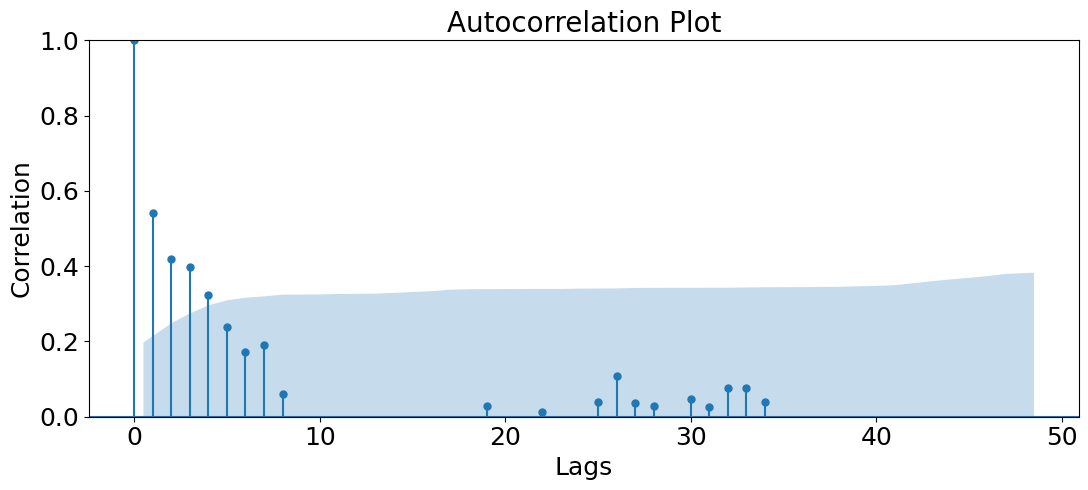

In [7]:
# Import packages
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Plot autocorrelation
plt.rc("figure", figsize=(11,5))
plot_acf(dataFrame['earthquakes_per_year'], lags=48)
plt.ylim(0,1)
plt.xlabel('Lags', fontsize=18)
plt.ylabel('Correlation', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Autocorrelation Plot', fontsize=20)
plt.tight_layout()
plt.show()


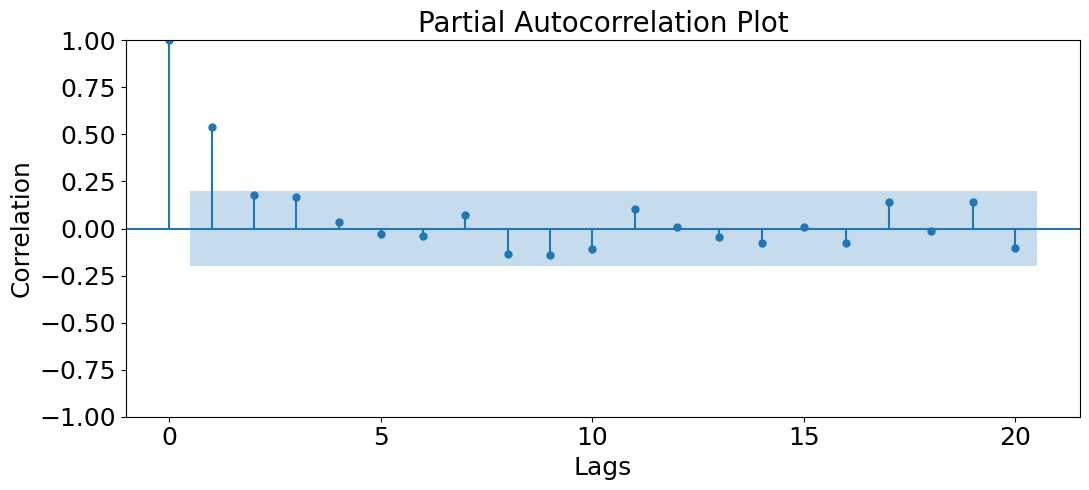

In [10]:
# Plot partial autocorrelation
from statsmodels.graphics.tsaplots import plot_pacf
plt.rc("figure", figsize=(11,5))
plot_pacf(data['earthquakes_per_year'], method='ywm')
plt.xlabel('Lags', fontsize=18)
plt.ylabel('Correlation', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Partial Autocorrelation Plot', fontsize=20)
plt.tight_layout()
plt.show()

In [11]:
data.columns
     

Index(['date', 'Year', 'earthquakes_per_year'], dtype='object')

In [4]:
"data[Month]=pd.to_datetime(data[Month])"
"data"
     

'data'

In [13]:
data.dtypes

date                     object
Year                      int64
earthquakes_per_year    float64
dtype: object

In [5]:
data.set_index("Month",inplace=True)
data

NameError: ignored

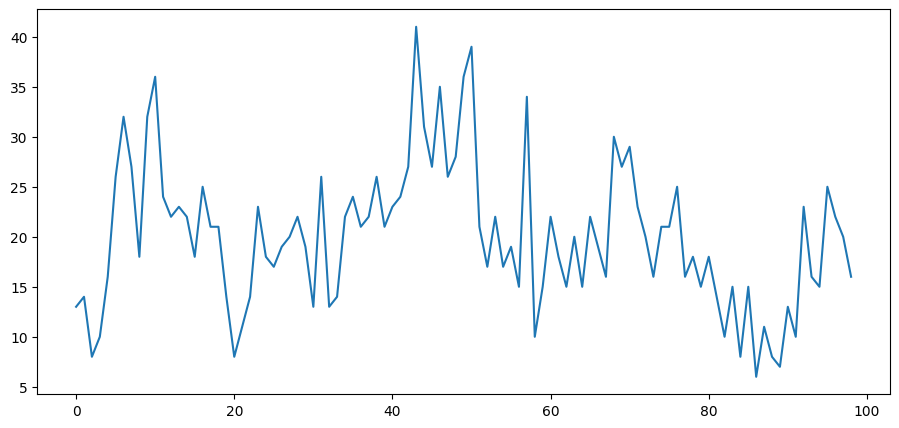

In [15]:
plt.plot(data["earthquakes_per_year"])
     

In [48]:
from statsmodels.tsa.stattools import adfuller
adf,pvalue,usedlag_,nobs_,critical_values_,icbest_=adfuller(data)

ValueError: ignored

In [17]:
print(pvalue) #if pvalue > 0.05 then data is not stationary

NameError: ignored

In [6]:
print(adf)
     

NameError: ignored

In [19]:
print(critical_values_)

NameError: ignored

In [20]:
data["year"]=[d.year for d in data.index]
data

AttributeError: ignored

In [21]:
data["month"]=[d.strftime('%b') for d in data.index]
data

AttributeError: ignored

In [22]:
sns.boxplot(x='year',y='earthquakes_per_year',data=data)

ValueError: ignored

In [24]:
sns.boxplot(x='month',y='earthquakes_per_year',data=data)

ValueError: ignored

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed=seasonal_decompose(data["earthquakes_per_year"],
                             model='additive'
                             )
     

ValueError: ignored

In [26]:
trend=decomposed.trend
sesonal=decomposed.seasonal
residual=decomposed.resid

NameError: ignored

In [27]:
trend

NameError: ignored

In [28]:
sesonal

NameError: ignored

In [30]:
residual
     

NameError: ignored

NameError: ignored

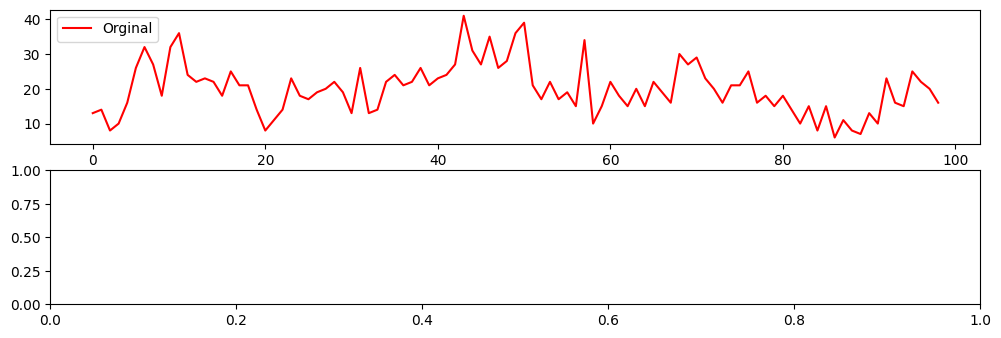

In [31]:
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(data["earthquakes_per_year"],label="Orginal",color='red')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend,label="Trend",color='red')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(sesonal,label="Sesonal",color='red')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual,label="Residual",color='red')
plt.legend(loc='upper left')
plt.show()

In [32]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 28.6 MB/s eta 0:00:00


In [33]:
from pmdarima.arima import auto_arima

In [34]:
arima_model=auto_arima(data["earthquakes_per_year"],start_p=1,d=1,start_q=1,
                      max_p=5,max_q=5,max_d=5,m=12,
                        start_P=0,D=1,start_Q=0,max_P=5,max_D=5,max_Q=5,
                      seasonal=True,
                       trace=True,
                      error_action="ignore",
                      suppress_warnings=True,
                      stepwise=True,n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=618.348, Time=0.72 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=636.429, Time=0.24 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=612.516, Time=0.80 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=594.161, Time=0.84 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=616.916, Time=0.31 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=595.838, Time=0.53 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=595.806, Time=0.69 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=605.052, Time=0.12 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=1.65 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=612.491, Time=0.17 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=595.929, Time=0.25 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=595.844, Time=0.28 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=602.092, Time=0.17 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=inf, Time=2.19 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AI

In [35]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   99
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -294.081
Date:                            Mon, 10 Apr 2023   AIC                            594.161
Time:                                    14:00:55   BIC                            601.524
Sample:                                         0   HQIC                           597.125
                                             - 99                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5469      0.094     -5.812      0.000      -0.731      -0.363
ma.S.L12      -0.7445      0.155     -4.790      0.000      -1.049      -0.440
sigma2        48.6898      7.847      6.205      0.000      33.310      64.070
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.77
Prob(Q):                              0.85   Prob(JB):                         0.68
Heteroskedasticity (H):               0.76   Skew:                             0.17
Prob(H) (two-sided):                  0.46   Kurtosis:                         3.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
size=int(len(data)*0.66)
X_train,X_test=data[0:size],data[size:len(data)]
     

In [37]:
X_train.shape

(65, 3)

In [38]:
X_test.shape
     

(34, 3)

In [39]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [40]:
model=SARIMAX(X_train["earthquakes_per_year"],
             order=(0,1,1),
             seasonal_order=(2,1,0,12))
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                earthquakes_per_year   No. Observations:                   65
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -181.784
Date:                             Mon, 10 Apr 2023   AIC                            371.569
Time:                                     14:03:06   BIC                            379.374
Sample:                                          0   HQIC                           374.561
                                              - 65                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5550      0.115     -4.838      0.000      -0.780      -0.330
ar.S.L12      -0.4071      0.212     -1.924      0.054      -0.822       0.008
ar.S.L24      -0.5166      0.205     -2.525      0.012      -0.918      -0.116
sigma2        53.8552     12.994      4.145      0.000      28.388      79.322
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                 0.78
Prob(Q):                              0.67   Prob(JB):                         0.68
Heteroskedasticity (H):               1.87   Skew:                             0.25
Prob(H) (two-sided):                  0.21   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
start_index=0
end_index=len(X_train)-1
train_predction=result.predict(start_index,end_index)
train_predction

0      0.000000
1     12.999714
2     13.999956
3      8.000264
4      9.999912
        ...    
60    16.275754
61    22.939744
62    23.115822
63     9.896692
64    12.834986
Name: predicted_mean, Length: 65, dtype: float64

In [42]:
st_index=len(X_train)
ed_index=len(data)-1
predction=result.predict(st_index,ed_index)
predction

65    15.103583
66     8.711692
67    15.080735
68     7.088287
69    19.306984
70     8.335234
71    13.317429
72    15.699013
73    12.968754
74    12.928101
75    15.279202
76    13.785637
77    13.816510
78    12.123707
79    22.912574
80    13.446280
81    16.545209
82    16.798843
83    14.556582
84    16.235723
85    19.187115
86    21.040917
87    12.589813
88    10.185214
89    12.774935
90     9.887961
91    16.620542
92     9.816600
93    20.131370
94     9.085035
95     9.793284
96    14.144057
97    14.126377
98    13.680233
Name: predicted_mean, dtype: float64

<Axes: >

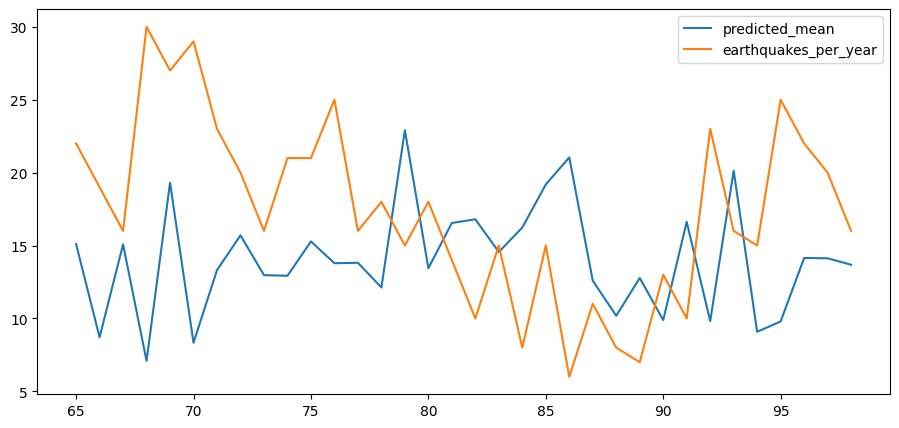

In [43]:
predction.plot(legend=True)
X_test["earthquakes_per_year"].plot(legend=True)
     

In [44]:
import math
from sklearn.metrics import mean_squared_error
     

In [45]:
trainScore=math.sqrt(mean_squared_error(X_train['earthquakes_per_year'],train_predction))
testScore=math.sqrt(mean_squared_error(X_test["earthquakes_per_year"],predction))
trainScore,testScore
     

(8.008576106063027, 8.829260153122172)

In [46]:
forcast=result.predict(start=len(data),
                      end=(len(data)-1)+3*12,
                      typ="levels").rename('Forecast')

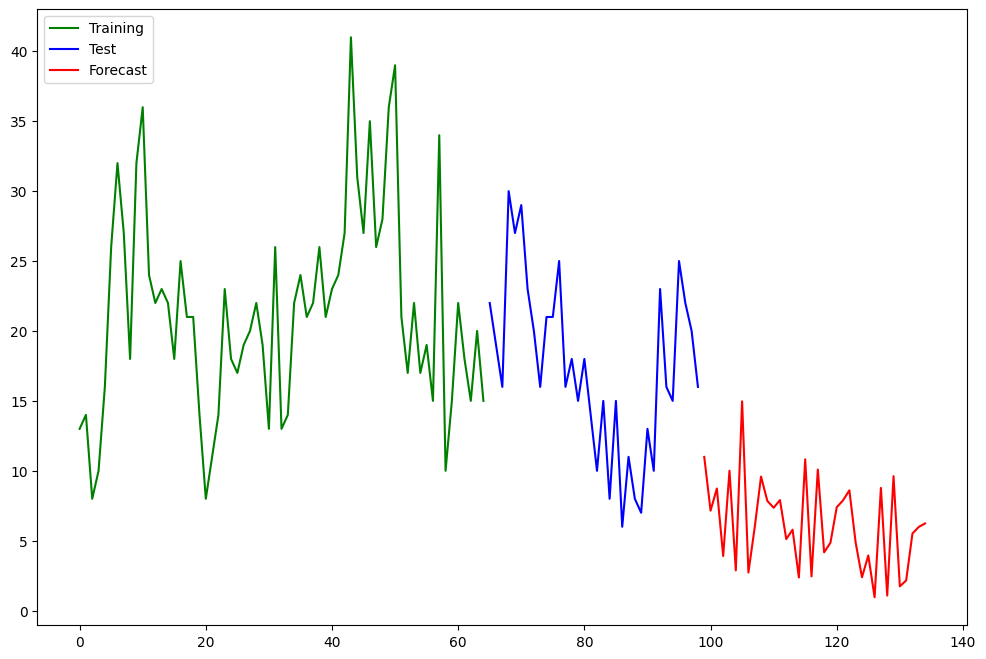

In [47]:
plt.figure(figsize=(12,8))
plt.plot(X_train["earthquakes_per_year"],label="Training",color='green')
plt.plot(X_test["earthquakes_per_year"],label="Test",color='blue')
plt.plot(forcast,label="Forecast",color="red")
plt.legend(loc="upper left")
     